In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.applications import Xception
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [3]:
# Definir rutas de las carpetas que contienen las imágenes
directorio = "../../../imagenes/mexh/"
img_width, img_height = 250, 250
input_shape = (img_width, img_height, 3)

In [4]:
# Hiperparámetros
epochs = 20
batch_size = 62

In [5]:
# Configurar el generador de datos de imágenes
generador_datos = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Cargar y dividir los datos en conjuntos de entrenamiento y prueba
generador_entrenamiento = generador_datos.flow_from_directory(
    directorio,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

generador_prueba = generador_datos.flow_from_directory(
    directorio,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 3200 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [6]:
# Cargar el modelo ResNet50 pre-entrenado sin la parte superior (include_top = False)
resnet_model = Xception(weights='imagenet', include_top=False, input_shape=input_shape)

# Congelar las capas de la ResNet50 pre-entrenada
for layer in resnet_model.layers:
    layer.trainable = False

83683744/83683744 [==============================] - 2s 0us/step


In [7]:
# Construir el modelo
model = Sequential()
model.add(resnet_model)
model.add(Flatten())
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [8]:
# Entrenar el modelo
historia = model.fit(
    generador_entrenamiento,
    steps_per_epoch=generador_entrenamiento.samples // batch_size,
    epochs=epochs,
    validation_data=generador_prueba,
    validation_steps=generador_prueba.samples // batch_size
)

Epoch 1/20
51/51 [==============================] - 17s 285ms/step - loss: 0.8592 - accuracy: 0.4984 - val_loss: 0.6932 - val_accuracy: 0.4946
Epoch 2/20
51/51 [==============================] - 14s 274ms/step - loss: 0.6934 - accuracy: 0.4920 - val_loss: 0.6931 - val_accuracy: 0.5027
Epoch 3/20
51/51 [==============================] - 14s 277ms/step - loss: 0.6936 - accuracy: 0.4892 - val_loss: 0.6931 - val_accuracy: 0.5027
Epoch 4/20
51/51 [==============================] - 14s 279ms/step - loss: 0.6935 - accuracy: 0.4994 - val_loss: 0.6932 - val_accuracy: 0.4973
Epoch 5/20
51/51 [==============================] - 14s 279ms/step - loss: 0.6938 - accuracy: 0.4987 - val_loss: 0.6931 - val_accuracy: 0.5054
Epoch 6/20
51/51 [==============================] - 14s 279ms/step - loss: 0.6934 - accuracy: 0.5019 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/20
51/51 [==============================] - 14s 281ms/step - loss: 0.6934 - accuracy: 0.4831 - val_loss: 0.6933 - val_accuracy: 0.4919

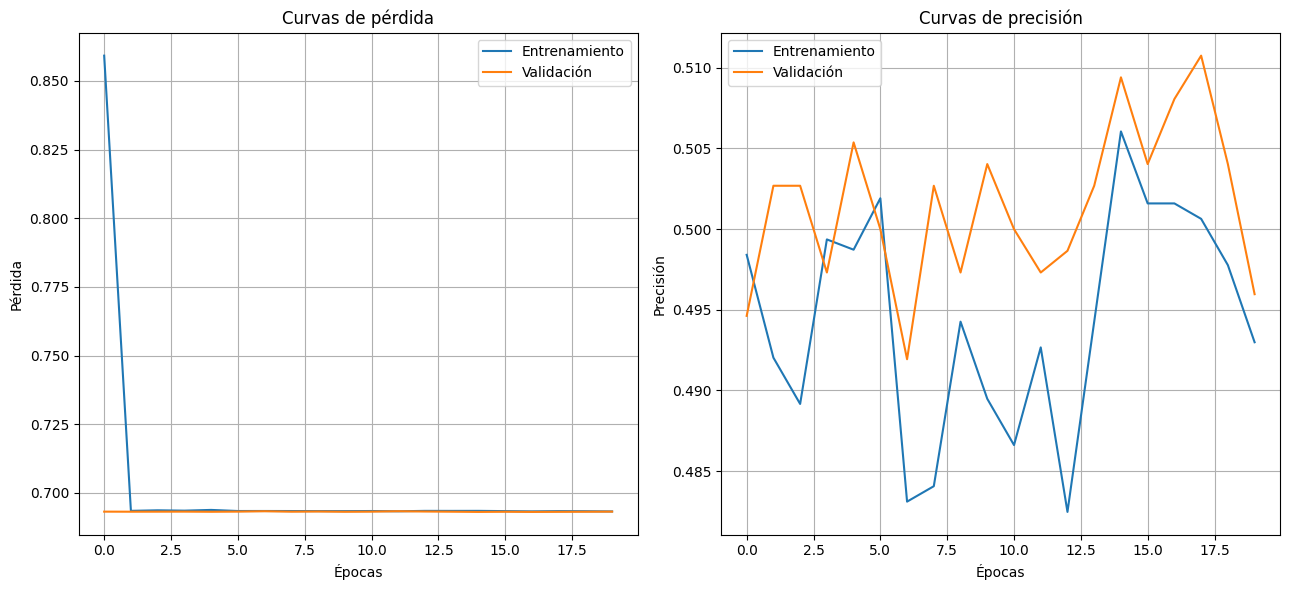

In [9]:
# Curvas de pérdida
plt.figure(figsize=(13,6))
plt.subplot(1, 2, 1)
plt.plot(historia.history['loss'], label='Entrenamiento')
plt.plot(historia.history['val_loss'], label='Validación')
plt.title('Curvas de pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid()

# Curvas de precisión
plt.subplot(1, 2, 2)
plt.plot(historia.history['accuracy'], label='Entrenamiento')
plt.plot(historia.history['val_accuracy'], label='Validación')
plt.title('Curvas de precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()